In [1]:
import torch

In [9]:
# 2층 인공신경망 
# 입력뉴런 5개 출력 3
sample =  torch.nn.Linear(in_features = 5 , out_features = 3)

# 미니배치가 2인 임의의 벡터 즉  벡터 2개 
data = torch.randn(2,5)
print(data)
# 인공신경망에 연결하고 결과 를 출력
sample(data)

tensor([[ 0.5723, -0.8967,  0.1915, -0.6934,  0.0072],
        [ 0.2334, -0.3273,  1.0535, -0.8444,  0.4401]])


tensor([[-0.3535, -0.6872, -0.1243],
        [-0.6637, -0.6116,  0.0312]], grad_fn=<AddmmBackward0>)

In [10]:
sample.weight, sample.bias

(Parameter containing:
 tensor([[ 0.1281,  0.0089, -0.1306,  0.1669, -0.3097],
         [-0.2906,  0.3355, -0.1568, -0.1110, -0.2204],
         [-0.3896,  0.2698, -0.3493, -0.1866,  0.3299]], requires_grad=True),
 Parameter containing:
 tensor([-0.2758, -0.2655,  0.2757], requires_grad=True))

In [12]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from torchsummary import summary

In [14]:
# 토치에서 데이터는 텐서형태로 사용
toTensor =  transforms.Compose([
    transforms.ToTensor()
])
train_loader =  DataLoader(
    MNIST('mnist',train=True, download=True, transform = toTensor),
    batch_size = 500, shuffle = True
)
val_loader =  DataLoader(
    MNIST('mnist',train=False, download=True, transform = toTensor),
    batch_size = 500, shuffle = True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [19]:
# DNN 모델 구성  Sequencial 하게 구성
model = nn.Sequential(
    nn.Flatten(),
    
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(128, 10),
    nn.Softmax(dim = 1)
)
print('\n DNN 요약')
summary(model, (1,28,28))


 DNN 요약
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
           Softmax-6                   [-1, 10]               0
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


In [20]:
# 손실함수, 최적화 함수
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)

In [21]:
for epoch in range(5):
  for idx,(data,label) in enumerate( train_loader):
    ouptput = model(data)
    #손실값 계산
    lossvalue = criterion(ouptput, label)

    #역전파 - 가중치 업데이트(보정)-> 연쇄미분
    model.zero_grad()
    lossvalue.backward()
    optimizer.step()

    # 배치내부에서 100번 마다 출력
    if idx % 100 == 0:  
      print(f"epoch:{epoch}, loss : {lossvalue.item():.4f}")


epoch:0, loss : 2.3026
epoch:0, loss : 1.5393
epoch:1, loss : 1.5173
epoch:1, loss : 1.5047
epoch:2, loss : 1.5190
epoch:2, loss : 1.5079
epoch:3, loss : 1.4981
epoch:3, loss : 1.5044
epoch:4, loss : 1.4938
epoch:4, loss : 1.5189


In [25]:
# 평가
import numpy as np
correct_list = []
for data, label in val_loader:
  with torch.no_grad():
    output  = model(data)
  
  output = torch.argmax(output, dim=1)
  correct = (output == label).sum() / len(label)
  correct_list.append(correct)
  print(f"정확도 : {correct}")
np.mean(correct_list)

정확도 : 0.9459999799728394
정확도 : 0.9539999961853027
정확도 : 0.9660000205039978
정확도 : 0.9520000219345093
정확도 : 0.9520000219345093
정확도 : 0.972000002861023
정확도 : 0.9620000123977661
정확도 : 0.9599999785423279
정확도 : 0.9440000057220459
정확도 : 0.9599999785423279
정확도 : 0.949999988079071
정확도 : 0.9539999961853027
정확도 : 0.9580000042915344
정확도 : 0.9639999866485596
정확도 : 0.9679999947547913
정확도 : 0.9660000205039978
정확도 : 0.9779999852180481
정확도 : 0.9660000205039978
정확도 : 0.9359999895095825
정확도 : 0.9679999947547913


0.9588

In [101]:
# 심장병 DNN - Torch
# git에 있는 heart.csv를 다운받아서 데이터 로드 하세요.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torchsummary import summary
import numpy as np

In [102]:
# seed 고정
torch.manual_seed(1)
np.random.seed(1)

# 판다스 옵션 조정  컬럼은 다 보이게
pd.options.display.max_columns = None

In [103]:
# 파일읽은후 x,y 분리
df = pd.read_csv('./heart.csv')
df.describe()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [104]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
colums = X.columns
X.shape, Y.shape,colums


((303, 13),
 (303,),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal'],
       dtype='object'))

In [105]:
# train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=32)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((227, 13), (76, 13), (227,), (76,))

In [106]:
# 학습용 정규화
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
# 약간의 데이터 분석 - 통계치 시각화

In [107]:
x_train = pd.DataFrame(x_train,columns=colums)
x_test = pd.DataFrame(x_test,columns=colums)
x_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02
mean,-1.721579e-16,-8.803531e-17,4.108314e-17,6.905881e-16,6.064654e-17,2.347608e-17,1.330311e-16,-1.721579e-16,-5.477752e-17,7.825361e-17,1.252058e-16,5.477752e-17,1.252058e-16
std,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00
min,-2.650431e+00,-1.452442e+00,-9.245132e-01,-2.126664e+00,-2.159269e+00,-3.827070e-01,-1.014467e+00,-2.447059e+00,-7.377111e-01,-8.916726e-01,-2.405896e+00,-7.188393e-01,-3.699834e+00
25%,-8.573009e-01,-1.452442e+00,-9.245132e-01,-6.306485e-01,-6.863490e-01,-3.827070e-01,-1.014467e+00,-7.536509e-01,-7.377111e-01,-8.916726e-01,-7.150652e-01,-7.188393e-01,-4.881234e-01
50%,-1.347519e-02,6.884954e-01,4.708169e-02,-5.525778e-02,-1.140678e-01,-3.827070e-01,9.206924e-01,1.376164e-01,-7.377111e-01,-3.545394e-01,-7.150652e-01,-7.188393e-01,-4.881234e-01
75%,7.776114e-01,6.884954e-01,1.018677e+00,5.201329e-01,5.520301e-01,-3.827070e-01,9.206924e-01,7.392218e-01,1.355544e+00,5.406825e-01,9.757661e-01,2.243776e-01,1.117732e+00
max,2.412524e+00,6.884954e-01,1.990271e+00,3.972477e+00,5.965247e+00,2.612965e+00,2.855851e+00,2.321221e+00,1.355544e+00,4.121570e+00,9.757661e-01,3.054028e+00,1.117732e+00


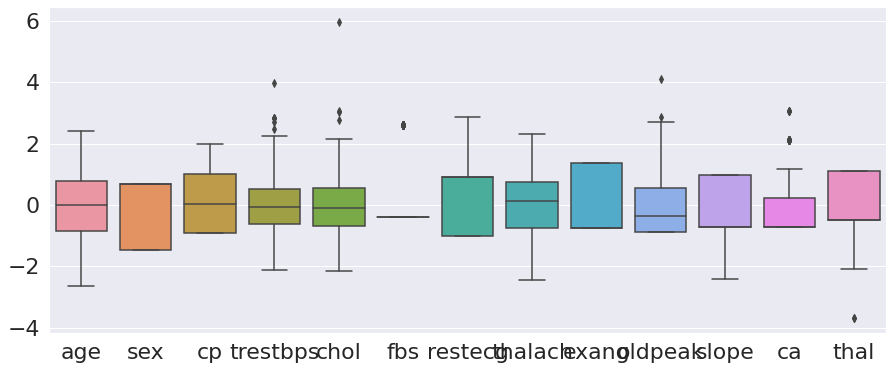

In [108]:
plt.figure(figsize = (15,6))
sns.set(font_scale = 2)
sns.boxplot(data=x_train)
#  x축 45도 또는 90도 회전
plt.show()

In [109]:
# 모델생성  3개의 층으로 구성된 신경망  시퀀셜
model = nn.Sequential(
    nn.Linear(len(colums) , 128),
    nn.ReLU(),
    nn.Linear(128 , 256),
    nn.ReLU(),
    nn.Linear(256 , 1),
    nn.Sigmoid()
)

In [110]:
# 옵티마이저
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
# 손실함수
criterion = nn.MSELoss()

# 이미지는 toTensro 를 통해 자료구를 변경했지만 그외는 데이터 변경
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()


In [111]:
type(criterion)

torch.nn.modules.loss.MSELoss

In [112]:
from pandas._config import options
# 훈련 - 토치는 직접 훈련 - 텐서플로... fit
for epoch in range(100):
  output = model(x_train)
  # 차원을 조정 1차원 벡터
  output = torch.squeeze(output)  
  lossvalue = criterion(output, y_train)
  
  # 오류역전파
  optimizer.zero_grad()
  lossvalue.backward()
  optimizer.step()  
  if epoch % 10 == 0:
    print(f"epoch: {epoch} loss : {lossvalue:.4f}")



epoch: 0 loss : 0.2487
epoch: 10 loss : 0.0613
epoch: 20 loss : 0.0401
epoch: 30 loss : 0.0310
epoch: 40 loss : 0.0309
epoch: 50 loss : 0.0309
epoch: 60 loss : 0.0308
epoch: 70 loss : 0.0308
epoch: 80 loss : 0.0308
epoch: 90 loss : 0.0308


In [113]:
# 평가 - 훈련과 동일한 과정인데 가중치 업데이트 방지

In [115]:
x_test = torch.FloatTensor(x_test.values)
with torch.no_grad():
  pred = model(x_test)

In [ ]:
pred = pred.numpy()
pred

In [119]:
pred = pred > 0.5
pred.flatten()

array([False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False, False,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True])

In [123]:
pred.shape, y_test.shape
f1_score(y_test,pred)

0.8250000000000001